In [2]:
import torch
import torchvision
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt


In [3]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10
random_seed = 1
torch.manual_seed(random_seed)

In [4]:
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./data/', train=True, download=True,
                               transform=torchvision.transforms.Compose([
                                   torchvision.transforms.ToTensor(),
                                   torchvision.transforms.Normalize(
                                       (0.1307,), (0.3081,))
                               ])),
    batch_size=batch_size_train, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./data/', train=False, download=True,
                               transform=torchvision.transforms.Compose([
                                   torchvision.transforms.ToTensor(),
                                   torchvision.transforms.Normalize(
                                       (0.1307,), (0.3081,))
                               ])),
    batch_size=batch_size_test, shuffle=True)

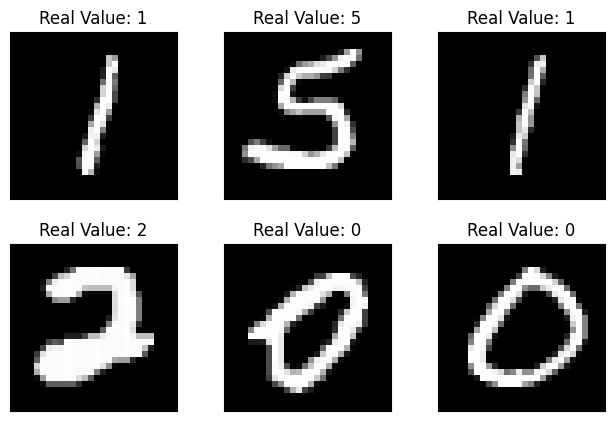

In [7]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
# print(example_targets)
# print(example_data.shape)
 
fig = plt.figure()
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Real Value: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
 
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [6]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
 
train_losses = []
train_counter = []
test_losses = []
test_counter = [i * len(train_loader.dataset) for i in range(n_epochs + 1)]

In [7]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch, batch_idx * len(data),
                                                                           len(train_loader.dataset),
                                                                           100. * batch_idx / len(train_loader),
                                                                           loss.item()))
            train_losses.append(loss.item())
            train_counter.append((batch_idx * 64) + ((epoch - 1) * len(train_loader.dataset)))
            torch.save(network.state_dict(), './model.pth')
            torch.save(optimizer.state_dict(), './optimizer.pth')

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.303384
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.279411
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.289252
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.262080
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.253610
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.227270
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.195740
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.184438
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.071461
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.949601
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.779031
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.790707
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.765616
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.678705
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.477044
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.439807
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.124465
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.139860
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.357752
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.921102
Train Epoch: 1 [12800/60000 (

Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.343982
Train Epoch: 1 [45440/60000 (76%)]	Loss: 0.426605
Train Epoch: 1 [46080/60000 (77%)]	Loss: 0.173146
Train Epoch: 1 [46720/60000 (78%)]	Loss: 0.579416
Train Epoch: 1 [47360/60000 (79%)]	Loss: 0.411240
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.415463
Train Epoch: 1 [48640/60000 (81%)]	Loss: 0.329334
Train Epoch: 1 [49280/60000 (82%)]	Loss: 0.321939
Train Epoch: 1 [49920/60000 (83%)]	Loss: 0.441047
Train Epoch: 1 [50560/60000 (84%)]	Loss: 0.273379
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.379494
Train Epoch: 1 [51840/60000 (86%)]	Loss: 0.461541
Train Epoch: 1 [52480/60000 (87%)]	Loss: 0.403109
Train Epoch: 1 [53120/60000 (88%)]	Loss: 0.539765
Train Epoch: 1 [53760/60000 (90%)]	Loss: 0.356772
Train Epoch: 1 [54400/60000 (91%)]	Loss: 0.387491
Train Epoch: 1 [55040/60000 (92%)]	Loss: 0.336587
Train Epoch: 1 [55680/60000 (93%)]	Loss: 0.162159
Train Epoch: 1 [56320/60000 (94%)]	Loss: 0.269604
Train Epoch: 1 [56960/60000 (95%)]	Loss: 0.272131


Train Epoch: 3 [28800/60000 (48%)]	Loss: 0.266540
Train Epoch: 3 [29440/60000 (49%)]	Loss: 0.229903
Train Epoch: 3 [30080/60000 (50%)]	Loss: 0.138896
Train Epoch: 3 [30720/60000 (51%)]	Loss: 0.282210
Train Epoch: 3 [31360/60000 (52%)]	Loss: 0.272156
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.413920
Train Epoch: 3 [32640/60000 (54%)]	Loss: 0.186155
Train Epoch: 3 [33280/60000 (55%)]	Loss: 0.269986
Train Epoch: 3 [33920/60000 (57%)]	Loss: 0.308235
Train Epoch: 3 [34560/60000 (58%)]	Loss: 0.167384
Train Epoch: 3 [35200/60000 (59%)]	Loss: 0.437138
Train Epoch: 3 [35840/60000 (60%)]	Loss: 0.341292
Train Epoch: 3 [36480/60000 (61%)]	Loss: 0.392021
Train Epoch: 3 [37120/60000 (62%)]	Loss: 0.179041
Train Epoch: 3 [37760/60000 (63%)]	Loss: 0.371167
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.150533
Train Epoch: 3 [39040/60000 (65%)]	Loss: 0.211571
Train Epoch: 3 [39680/60000 (66%)]	Loss: 0.196445
Train Epoch: 3 [40320/60000 (67%)]	Loss: 0.210556
Train Epoch: 3 [40960/60000 (68%)]	Loss: 0.694209


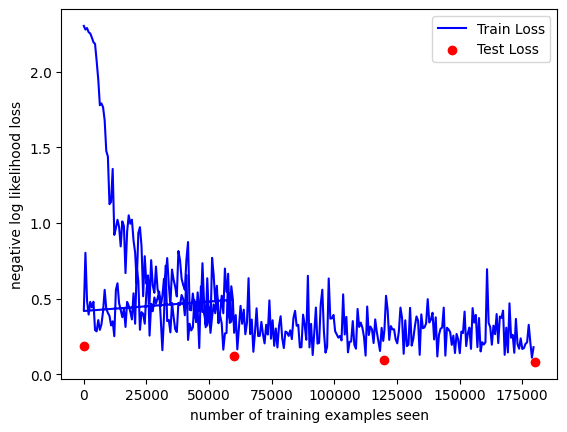

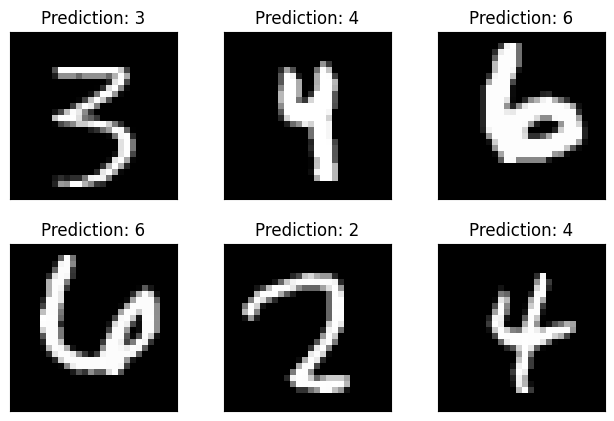

In [8]:
def test():
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = network(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
 
 
train(1)
 
test()  # 不加这个，后面画图就会报错：x and y must be the same size
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()
 
 
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
 
 
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
with torch.no_grad():
    output = network(example_data)
fig = plt.figure()
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Prediction: {}".format(output.data.max(1, keepdim=True)[1][i].item()))
    plt.xticks([])
    plt.yticks([])
plt.show()

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.286894
Train Epoch: 4 [640/60000 (1%)]	Loss: 0.249859
Train Epoch: 4 [1280/60000 (2%)]	Loss: 0.517553
Train Epoch: 4 [1920/60000 (3%)]	Loss: 0.204686
Train Epoch: 4 [2560/60000 (4%)]	Loss: 0.240334
Train Epoch: 4 [3200/60000 (5%)]	Loss: 0.284107
Train Epoch: 4 [3840/60000 (6%)]	Loss: 0.323630
Train Epoch: 4 [4480/60000 (7%)]	Loss: 0.209828
Train Epoch: 4 [5120/60000 (9%)]	Loss: 0.245734
Train Epoch: 4 [5760/60000 (10%)]	Loss: 0.137380
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.321339
Train Epoch: 4 [7040/60000 (12%)]	Loss: 0.331240
Train Epoch: 4 [7680/60000 (13%)]	Loss: 0.234634
Train Epoch: 4 [8320/60000 (14%)]	Loss: 0.156647
Train Epoch: 4 [8960/60000 (15%)]	Loss: 0.117039
Train Epoch: 4 [9600/60000 (16%)]	Loss: 0.338696
Train Epoch: 4 [10240/60000 (17%)]	Loss: 0.250816
Train Epoch: 4 [10880/60000 (18%)]	Loss: 0.362582
Train Epoch: 4 [11520/60000 (19%)]	Loss: 0.370210
Train Epoch: 4 [12160/60000 (20%)]	Loss: 0.097786
Train Epoch: 4 [12800/60000 (

Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.207708
Train Epoch: 5 [45440/60000 (76%)]	Loss: 0.212350
Train Epoch: 5 [46080/60000 (77%)]	Loss: 0.214294
Train Epoch: 5 [46720/60000 (78%)]	Loss: 0.145969
Train Epoch: 5 [47360/60000 (79%)]	Loss: 0.129736
Train Epoch: 5 [48000/60000 (80%)]	Loss: 0.373289
Train Epoch: 5 [48640/60000 (81%)]	Loss: 0.089385
Train Epoch: 5 [49280/60000 (82%)]	Loss: 0.179381
Train Epoch: 5 [49920/60000 (83%)]	Loss: 0.263971
Train Epoch: 5 [50560/60000 (84%)]	Loss: 0.356577
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.166047
Train Epoch: 5 [51840/60000 (86%)]	Loss: 0.261995
Train Epoch: 5 [52480/60000 (87%)]	Loss: 0.266505
Train Epoch: 5 [53120/60000 (88%)]	Loss: 0.217664
Train Epoch: 5 [53760/60000 (90%)]	Loss: 0.331640
Train Epoch: 5 [54400/60000 (91%)]	Loss: 0.456580
Train Epoch: 5 [55040/60000 (92%)]	Loss: 0.227775
Train Epoch: 5 [55680/60000 (93%)]	Loss: 0.213341
Train Epoch: 5 [56320/60000 (94%)]	Loss: 0.224655
Train Epoch: 5 [56960/60000 (95%)]	Loss: 0.087107


Train Epoch: 7 [28800/60000 (48%)]	Loss: 0.188004
Train Epoch: 7 [29440/60000 (49%)]	Loss: 0.209060
Train Epoch: 7 [30080/60000 (50%)]	Loss: 0.255263
Train Epoch: 7 [30720/60000 (51%)]	Loss: 0.116942
Train Epoch: 7 [31360/60000 (52%)]	Loss: 0.256569
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.148827
Train Epoch: 7 [32640/60000 (54%)]	Loss: 0.233805
Train Epoch: 7 [33280/60000 (55%)]	Loss: 0.110409
Train Epoch: 7 [33920/60000 (57%)]	Loss: 0.150877
Train Epoch: 7 [34560/60000 (58%)]	Loss: 0.146981
Train Epoch: 7 [35200/60000 (59%)]	Loss: 0.232125
Train Epoch: 7 [35840/60000 (60%)]	Loss: 0.229150
Train Epoch: 7 [36480/60000 (61%)]	Loss: 0.146494
Train Epoch: 7 [37120/60000 (62%)]	Loss: 0.052247
Train Epoch: 7 [37760/60000 (63%)]	Loss: 0.196943
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.140355
Train Epoch: 7 [39040/60000 (65%)]	Loss: 0.291539
Train Epoch: 7 [39680/60000 (66%)]	Loss: 0.371338
Train Epoch: 7 [40320/60000 (67%)]	Loss: 0.311349
Train Epoch: 7 [40960/60000 (68%)]	Loss: 0.165368


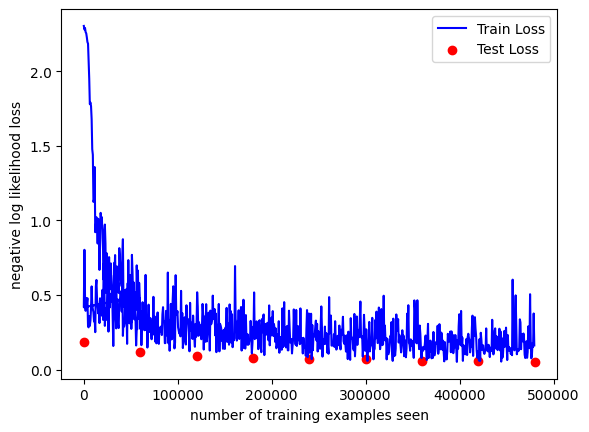

In [9]:
# ----------------------------------------------------------- #
 
continued_network = Net()
continued_optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
 
network_state_dict = torch.load('model.pth')
continued_network.load_state_dict(network_state_dict)
optimizer_state_dict = torch.load('optimizer.pth')
continued_optimizer.load_state_dict(optimizer_state_dict)
 
# 注意不要注释前面的“for epoch in range(1, n_epochs + 1):”部分，
# 不然报错：x and y must be the same size
# 为什么是“4”开始呢，因为n_epochs=3，上面用了[1, n_epochs + 1)
for i in range(4, 9):
    test_counter.append(i*len(train_loader.dataset))
    train(i)
    test()
 
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
plt.show()
 